In [1]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
#import perceptron pos tagger
# from nltk.tag.perceptron import PerceptronTagger
#import ntlk pos tagger
from nltk import pos_tag

#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#import SVM classifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report




[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/neerajs/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/neerajs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(array([3.817e+03, 2.448e+03, 1.656e+03, 8.700e+02, 5.030e+02, 2.630e+02,
        1.380e+02, 6.200e+01, 3.800e+01, 1.900e+01, 9.000e+00, 1.100e+01,
        5.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  14.1,  27.2,  40.3,  53.4,  66.5,  79.6,  92.7, 105.8,
        118.9, 132. , 145.1, 158.2, 171.3, 184.4, 197.5, 210.6, 223.7,
        236.8, 249.9, 263. , 276.1, 289.2, 302.3, 315.4, 328.5, 341.6,
        354.7, 367.8, 380.9, 394. , 407.1, 420.2, 433.3, 446.4, 459.5,
        472.6, 485.7, 498.8, 511.9, 525. ]),
 <BarContainer object of 40 artists>)

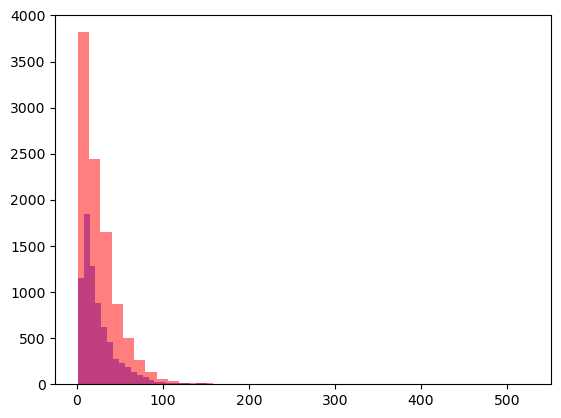

In [2]:
#download emma text
emma = gutenberg.raw('austen-emma.txt')
emma_sent = nltk.sent_tokenize(emma)
# print(emma_sent[:2])
# print(emma[:1000])

#for each sentence in emma, tokenize it
emma_tokens = [nltk.word_tokenize(sent) for sent in emma_sent]
# print(emma_tokens[:2])

#tag each token with a part of speech
# emma_pos = [nltk.pos_tag(sent) for sent in emma_tokens]

#find the most common parts of speech
# pos_freq = nltk.FreqDist(tag for sent in emma_pos for (word, tag) in sent)

#find the average length of a sentence
lengths_emma = [len(sent) for sent in emma_tokens]
# avg_sent_length = sum(len(sent) for sent in emma_tokens) / len(emma_tokens)
# print(avg_sent_length)
#graph the distribution of sentence lengths
# plt.hist(lengths_emma, bins=40)

# print(lengths)

#download moby dick text
moby = gutenberg.raw('melville-moby_dick.txt')
moby_sent = nltk.sent_tokenize(moby)

moby_tokens = [nltk.word_tokenize(sent) for sent in moby_sent]
lengths_moby = [len(sent) for sent in moby_tokens]

#plot moby distribution on same graph, with different color

# #new figure
# plt.figure()
# plt.hist(lengths_moby, bins=40, color='red')

# #plot both distributions on same graph
# plt.figure()
# plt.hist(lengths_emma, bins=40, color='blue')
# plt.hist(lengths_moby, bins=40, color='red')

#plot both distributions on same graph, with transparency
plt.figure()
plt.hist(lengths_emma, bins=40, color='blue', alpha=0.5)
plt.hist(lengths_moby, bins=40, color='red', alpha=0.5)


(array([3.000e+00, 0.000e+00, 8.000e+01, 3.500e+01, 1.600e+01, 1.290e+02,
        2.300e+01, 1.630e+02, 2.290e+02, 2.340e+02, 3.010e+02, 5.560e+02,
        3.700e+02, 6.650e+02, 7.240e+02, 8.510e+02, 9.430e+02, 1.066e+03,
        9.550e+02, 8.350e+02, 6.340e+02, 4.200e+02, 2.650e+02, 1.540e+02,
        5.700e+01, 4.600e+01, 3.500e+01, 2.300e+01, 1.500e+01, 1.000e+01,
        5.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([1.        , 1.16785714, 1.33571429, 1.50357143, 1.67142857,
        1.83928571, 2.00714286, 2.175     , 2.34285714, 2.51071429,
        2.67857143, 2.84642857, 3.01428571, 3.18214286, 3.35      ,
        3.51785714, 3.68571429, 3.85357143, 4.02142857, 4.18928571,
        4.35714286, 4.525     , 4.69285714, 4.86071429, 5.02857143,
        5.19642857, 5.36428571, 5.53214286, 5.7       , 5.86785714,
        6.03571429, 6.20357143, 6.37142857, 6.53928571, 6.70714286,
        6.875     , 7.0428

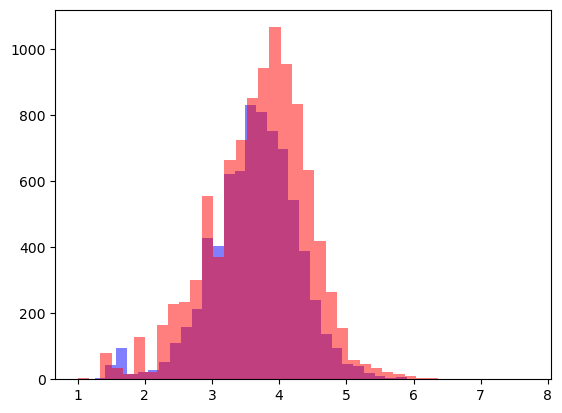

In [3]:
# #find the lengths of every word in emma

# #flatten the list of lists
# w_lengths_emma = [len(word) for sent in emma_tokens for word in sent]

# #find the lengths of every word in moby 
# # w_lengths_moby = [len(word) for word in moby_tokens]
# w_lengths_moby = [len(word) for sent in moby_tokens for word in sent]


# #plot the distribution of word lengths with transparency
# plt.figure()
# plt.hist(w_lengths_emma, bins=40, color='blue', alpha=0.5)
# plt.hist(w_lengths_moby, bins=40, color='red', alpha=0.5)

#find the average length of a word in each sentence in emma
avg_word_length_emma = [sum(len(word) for word in sent) / len(sent) for sent in emma_tokens]

#find the average length of a word in each sentence in moby
avg_word_length_moby = [sum(len(word) for word in sent) / len(sent) for sent in moby_tokens]

#plot the distribution of word lengths with transparency
plt.figure()
plt.hist(avg_word_length_emma, bins=40, color='blue', alpha=0.5)
plt.hist(avg_word_length_moby, bins=40, color='red', alpha=0.5)


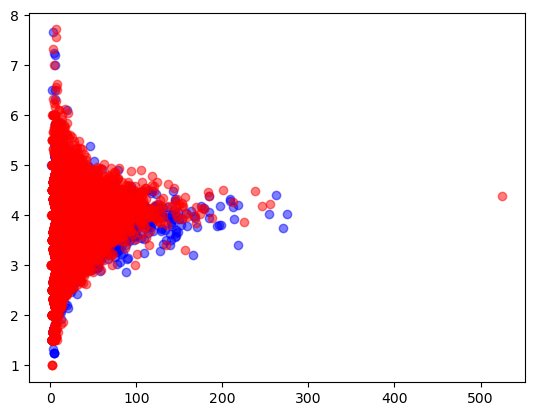

In [4]:
#plot the average word length in each sentence and the average sentence length for emma and moby in a scatter plot
plt.figure()
plt.scatter(lengths_emma, avg_word_length_emma, color='blue', alpha=0.5)
plt.scatter(lengths_moby, avg_word_length_moby, color='red', alpha=0.5)

In [5]:
#create 2d array of sentence lengths and average word lengths and labels for emma and moby
# emma_data = np.array([lengths_emma, avg_word_length_emma])

#create 2d array where each row is sentence length and average word length
emma_data = np.array([lengths_emma, avg_word_length_emma]).T

#add third column of 0s to emma_data
emma_data = np.column_stack((emma_data, np.zeros(len(emma_data))))

print(emma_data.shape)

moby_data = np.array([lengths_moby, avg_word_length_moby]).T
# #add third column of 1s to moby_data
moby_data = np.column_stack((moby_data, np.ones(len(moby_data))))


#combine emma and moby data
data = np.concatenate((emma_data, moby_data))
#shuffle the data
np.random.shuffle(data)

#split the data into training and testing sets
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]

#split the training and testing sets into features and labels
train_features = train[:,:2]
train_labels = train[:,2]
#print unique labels
# print(train_labels)

test_features = test[:,:2]
test_labels = test[:,2]

#train an SVM model
model = SVC()
model.fit(train_features, train_labels)

#test the model
predictions = model.predict(test_features)


#print the classification report
print(classification_report(test_labels, predictions))


(7456, 3)
              precision    recall  f1-score   support

         0.0       0.59      0.01      0.02      1492
         1.0       0.57      1.00      0.72      1970

    accuracy                           0.57      3462
   macro avg       0.58      0.50      0.37      3462
weighted avg       0.58      0.57      0.42      3462

